In [1]:
import numpy as np
import pandas as pd

A base de dados que vamos utilizar já está limpa e pronta para ser aplicado um algoritmo de aprendizagem de máquina.

Nós queremos prever o preço de casas através de algumas características. Como discutimos em sala, esse é um problema de regressão e vamos resolver com um algoritmo bastante simples.

Recomendo a leitura do livro ISLR, que é gratuito.

https://www-bcf.usc.edu/~gareth/ISL/

Nós vamos utilizar um algoritmo de regressão linear, mas o procedimento para problemas de classificação é muito parecido.

In [2]:
df = pd.read_csv('USA_Housing.csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Como discutido em sala, poderíamos fazer alguma espécie de **Feature Engineering** na coluna de endereço, mas vamos apenas ignorá-la, deletando-a.

In [4]:
df.drop('Address', axis=1, inplace=True)

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


Já que queremos prever os preços (e estamos em aprendizagem supervisionada), a coluna "Price" é o nosso **target** enquanto que as outras colunas vão ser **features** (características)

Como discutido em sala, vamos dividir esses dados em X (características) e y (alvo).

**Lembrando que df.drop('Price', axis=1) vai retornar a tabela inteira sem a coluna Price e ela não será eliminada permanentemente, pois não colocamos inplace=True **

In [7]:
X = df.drop('Price', axis=1)
y = df['Price']

Agora faremos o simples train_test_split discutido em sala

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#Lembrando que com o auxílio do Jupyter não precisamos "decorar" essa declaração
#Podemos apenas digitar "train_test_split" e consultar a documentação com Shift+Tab e copiar de exemplos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
#Separamos 30% da base de dados para teste (0.3)

#random_state é apenas uma semente para caso vocês queiram replicar o resultado.

Agora basta importar o nosso modelo de regressão linear.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#instanciando nosso modelo
lm = LinearRegression()

In [14]:
#Treinando com os dados que separamos para usar para treino
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Vamos checar o y-intercept e os coeficientes da nossa regressão antes de fazer as previsões.

Verificar o intercept e os coeficientes é ótimo para inferência.

**Para mais informações, como a matemática por trás de tudo dito aqui, checar o ISLR**

In [15]:
lm.intercept_

-2662966.163066389

In [16]:
lm.coef_

array([2.17131035e+01, 1.66615038e+05, 1.21336180e+05, 2.75060304e+03,
       1.52303490e+01])

Os coeficientes se relacionam com cada característica em X.

In [17]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

Vamos montar um dataframe para ficar mais "visível" para nós.

In [18]:
coef = pd.DataFrame(data=lm.coef_, index=X.columns, columns=['Coef'])

In [19]:
coef

,Coef
Avg. Area Income,21.713104
Avg. Area House Age,166615.038087
Avg. Area Number of Rooms,121336.179864
Avg. Area Number of Bedrooms,2750.603045
Area Population,15.230349


Como dito, vale muito a pena verificar o ISLR. Mas os coeficientes realmente trazem informação importante para nós.

Baseado nos coeficientes, podemos dizer que, mantendo-se fixos os valores de cada característica e aumentando em **1 unidade** o valor da média da idade das casas na área (**Avg. Area House Age**), temos um **aumento de 166 mil dólares** no preço.

Assim como, aumentar em uma unidade o **Avg. Area Income** enquanto mantém as outras características fixas implica num **21 dólares e 71 centavos** no preço.

#### Mas isso faz sentido? Provavelmente não, já que essa base de dados é de dados artificiais.

### Agora vamos prever com as características X_test que separamos para testar

In [22]:
pred = lm.predict(X_test)
#pred são os valores de y que nosso modelo encontrou para cada ocorrência em X_test

### Feito isso, podemos avaliar o nosso trabalho comparando os valores achados por nós em "pred" com os valores REAIS presentes em y_test

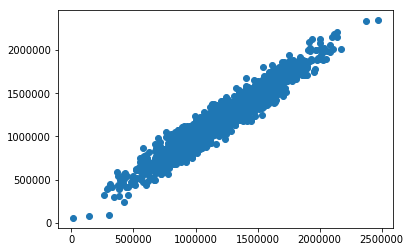

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, pred)

O nosso gráfico de dispersão (scatterplot) ficou bem próximo de uma reta! Isso quer dizer que fizemos um bom trabalho!

### Também podemos avaliar através de Residuals, MAE, MSE e RMSE. Que não vimos em sala, mas comentamos. Para informações a respeito disso, checar o ISLR

Primeiramente vamos checar os Residuals.

/home/fernando/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


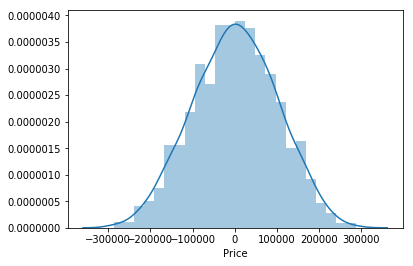

In [25]:
import seaborn as sns

sns.distplot( (y_test - pred) )

Aparentemente nossos residuals estão distribuídos normalmente, e isso é um ótimo sinal. Se não víssemos uma distribuição normal nos residuals, é possível que uma regressão linear não tenha sido uma boa escolha.

#### Vamos agora calcular o MAE (Mean Absolute Error)

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
mean_absolute_error(y_test, pred)

80237.08905888008

#### MSE (Mean Squared Error)

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(y_test, pred)

9879448079.693956

#### RMSE (Root Mean Squared Error)

In [30]:
np.sqrt(mean_squared_error(y_test, pred))

99395.41276987563

## Para saber interpretar os valores, favor checar o ISLR.